# Approfondimento ed esercizi sulla lezione pratica di WMR del 7/04/2023

Autore del codice mostrato a lezione:Claudiu Daniel Hromei
#Autore dell'approfondimento: Federico Ranaldi 13/04/2023

In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [ ]:
# option to print all the value of cells in DataFrames
pd.set_option("max_colwidth", None)

# Question Classification dataset
We will use a different dataset, whose objective is to classify the given Questions into respective categories based on what type of answer it expects such as a numerical answer or a text description or a place or human name etc.
Load the dataset and print the classes

In [ ]:
training_data = pd.read_csv("./train.csv")
testing_data = pd.read_csv("./test.csv")

classes = list(np.unique(testing_data['classes']))
print(classes)

['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM']


Let's see some examples.

In [ ]:
training_data.head(10)

,questions,classes
0,How did serfdom develop in and then leave Russia ?,DESC
1,What films featured the character Popeye Doyle ?,ENTY
2,How can I find a list of celebrities ' real names ?,DESC
3,What fowl grabs the spotlight after the Chinese Year of the Monkey ?,ENTY
4,What is the full form of .com ?,ABBR
5,What contemptible scoundrel stole the cork from my lunch ?,HUM
6,What team did baseball 's St. Louis Browns become ?,HUM
7,What is the oldest profession ?,HUM
8,What are liver enzymes ?,DESC
9,Name the scar-faced bounty hunter of The Old West .,HUM


We can plot the number of examples for each class.
As we can we can see we are going to train the svm model with unbalanced dataset

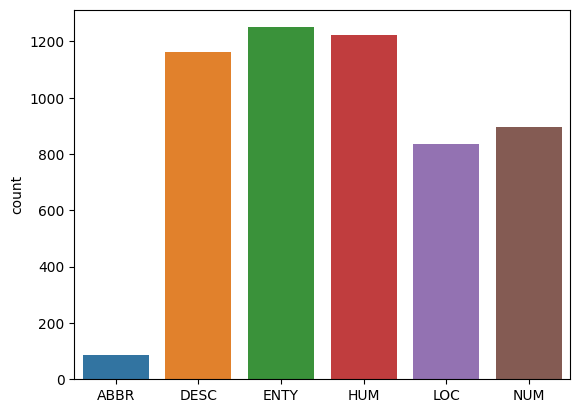

In [ ]:
training_plot = sns.countplot(x=sorted(training_data['classes']))

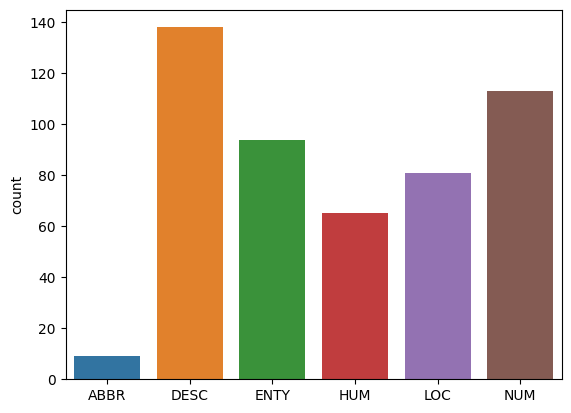

In [ ]:
testing_plot = sns.countplot(x=sorted(testing_data['classes']))

# Support Vector Machines

Definition of the model using the Bag-of-Words (tf-idf) formulation from previous exercises in order to compute some hyperplanes for the classification.  

An overview of the main parameters:

- **C**: `float`, default=`1.0`  
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

- **kernel**: `{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}` or callable, default=`'rbf'`  
Specifies the kernel type to be used in the algorithm. If none is given, `‘rbf’` will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape `(n_samples, n_samples)`.

- **degree**: `int`, default=`3`  
Degree of the polynomial kernel function (`‘poly’`). Must be non-negative. Ignored by all other kernels.

- **gamma**: `{‘scale’, ‘auto’}` or `float`, default=`’scale’`  
Kernel coefficient for `‘rbf’`, `‘poly’` and `‘sigmoid’`.

  - if gamma = `'scale'` (default) is passed then it uses `1 / (n_features * X.var())` as value of gamma,
  - if `‘auto’`, uses `1 / n_features`
  - if `float`, must be non-negative.

- **verbose**: `bool`, default=`False`  
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

- **max_iter**: `int`, default=`-1`  
Hard limit on iterations within solver, or `-1` for no limit.

- **decision_function_shape**: `{‘ovo’, ‘ovr’}`, default=`’ovr’`  
Whether to return a one-vs-rest (`‘ovr’`) decision function of shape `(n_samples, n_classes)` as all other classifiers, or the original one-vs-one (`‘ovo’`) decision function of libsvm which has shape `(n_samples, n_classes * (n_classes - 1) / 2)`. However, note that internally, one-vs-one (`‘ovo’`) is always used as a multi-class strategy to train models; an ovr matrix is only constructed from the ovo matrix. The parameter is ignored for binary classification.

Notice that we are using the `polynomial` version of the SVM model, so the `degree` **must** be defined.

## SVM - BoW

Let's apply again the Bag-of-Word (tf-idf) policy to encode these sentences and evaluate an SVM model.



In [ ]:
# Extract features from the dataset
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_data['questions'].tolist())
X_test = vectorizer.transform(testing_data['questions'].tolist())
y_train = training_data['classes'].tolist()
y_test = testing_data['classes'].tolist()

In [ ]:
print(training_data['questions'][0])
print("The BOW-Encoding is the following:\n",X_train[0])

How did serfdom develop in and then leave Russia ?
The BOW-Encoding is the following:
   (0, 6552)	0.408409013229322
  (0, 4390)	0.400350228830404
  (0, 7586)	0.3817037559318125
  (0, 509)	0.18605520137905246
  (0, 3888)	0.13451621347245526
  (0, 2273)	0.44464578942200644
  (0, 6747)	0.46584294464175197
  (0, 2306)	0.1903120385256883
  (0, 3786)	0.15354043805413076


THE PARAMETRES ARE EXPLAINED ABOVE

In [ ]:
C = 1
decision_function_shape = 'ovr' 
max_iter = -1
kernel = "poly"
degree = 5
gamma = 4

In [ ]:
svm = SVC(C=C, max_iter=max_iter, degree=degree, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)

In [ ]:
svm = SVC(C=C, max_iter=max_iter, degree=degree, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)

svm.fit(X_train, y_train)

InvalidParameterError: ignored

We provide the classification report for the svm using a polinomial kernel function of degree 2...

In [ ]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        ABBR       0.67      0.44      0.53         9
        DESC       0.84      0.76      0.80       138
        ENTY       0.35      0.86      0.50        94
         HUM       0.58      0.82      0.68        65
         LOC       0.87      0.25      0.38        81
         NUM       0.95      0.19      0.31       113

    accuracy                           0.57       500
   macro avg       0.71      0.55      0.53       500
weighted avg       0.74      0.57      0.54       500



We're looking for the deegree of the best by polinomial kernel function by doing a 5 -fold cross-validation and analizing the mean f1-macro obtained in each fold.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = []
degrees_list = [2,3,4,5,6,7,8]
for d in degrees_list:
    print(d)
    svm = SVC(C=C, max_iter=max_iter, degree=d, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)
    mean_score = cross_val_score(svm, X_train, y_train, cv=5, scoring="f1_macro").mean()
    print(mean_score)
    scores.append((d, mean_score))
    print(20*"*")

print(scores)

2
0.796884422693735
********************
3
0.6510732388958493
********************
4
0.47072928788254476
********************
5
0.3532149389260894
********************
6
0.2811393864879602
********************
7


KeyboardInterrupt: ignored

We've found that by fixing the following parameters:
- C = 1
- decision_function_shape = 'ovr' 
- max_iter = -1
- kernel = "poly"
- degree = ?
- gamma = 4


...the best deegree for the polinomial kernel function is 2 since we obtained the best f1-macro mean on 5fold cross-validation.

We provide the classification report for the svm with a polinomial kernel function with degree 2...

In [ ]:
svm_poly_2 = SVC(C=C, max_iter=max_iter, degree=2, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)

svm_poly_2.fit(X_train, y_train)

y_pred = svm_poly_2.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        ABBR       0.70      0.78      0.74         9
        DESC       0.79      0.94      0.86       138
        ENTY       0.80      0.72      0.76        94
         HUM       0.86      0.92      0.89        65
         LOC       0.90      0.86      0.88        81
         NUM       1.00      0.82      0.90       113

    accuracy                           0.86       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.86      0.86      0.86       500



---

Let's try using a more advanced kernel: the Radial Basis Function (`rbf`). It is defined as the exponential of the Squared Euclidean Distance between two feature vectors in a space, multiplied by a parameter `gamma`. The output ranges between 0 and 1 (when `x=x'`) and it has a ready interpretation as a *similarity measure*.

![image.png](attachment:image.png)

In [ ]:
svm_rbf = SVC(C=C, max_iter=max_iter, degree=0, kernel='rbf', gamma=gamma, decision_function_shape=decision_function_shape)

svm_rbf.fit(X_train, y_train)

SVC(C=1, degree=0, gamma=4)

We provide the classification report for the svm with a radial basis as kernel function ...

In [ ]:
y_pred = svm_rbf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        ABBR       0.67      0.44      0.53         9
        DESC       0.81      0.78      0.79       138
        ENTY       0.34      0.93      0.50        94
         HUM       0.71      0.85      0.77        65
         LOC       1.00      0.20      0.33        81
         NUM       1.00      0.09      0.16       113

    accuracy                           0.56       500
   macro avg       0.75      0.55      0.51       500
weighted avg       0.78      0.56      0.51       500



OBSERVATIONS: the svm using a polinomial kernel function of degree 2 seems to perform better on the test set

We now create a mini-test set that contains 21 questions with 21 labels associated.We are going to test the svm models trained until now...

In [ ]:
new_questions = [
    "Where was Napoleon born?",
    "Where does the nature conservancy get its funding?",
    "Who is the song killing me softly written about?",
    "Who owned most of the railroads in the 1800s?",
    "How far is chardon ohio from cleveland ohio?",
    "Who has the right of way in international waters?",
    "Who does annie work for attack on titan?",
    "When was the immigration reform and control act passed?",
    "When was Puerto Rico added to the USA?",
    "Who has been chosen for best supporting actress in 64 national filmfare award?",
    "What does GIF stand for?",
    "Where is the toilet?",
    "What is the full form www ?",
    "How old is your dog?",
    "What are the bases of dna?",
    "How many poors are in India?",
    "Name a football team who won the Champions League",
    "Where does Batman park the Bat-Mobile",
    "What does USA stands for?",
    "What are the rules of tennis?",
    "Who killed JFK?"
]

#classes=[ABBR,DESC,ENTY,HUM,LOC,NUM]

new_labels = [
    "LOC",
    "DESC",
    "ENTY",
    "ENTY",
    "NUM",
    "ENTY",
    "ENTY",
    "HUM",
    "NUM",
    "ENTY",
    "ABBR",
    "LOC",
    "ABBR",
    "NUM",
    "DESC",
    "NUM",
    "ENTY",
    "LOC",
    "ABBR",
    "DESC",
    "HUM"
]

In [ ]:
np.unique(y_train)

array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM'], dtype='<U4')

We use the same vectorizer used before for the encoding of our mini test set. 

In [ ]:
#vectorizer = TfidfVectorizer() 
#X_train = vectorizer.fit_transform(training_data['questions'].tolist())
#y_train = training_data['classes'].tolist()

X_test=vectorizer.transform(new_questions)
y_test = new_labels

In [ ]:
print(new_questions[0])
print("The BOW-Encoding is the following:\n",X_test[0])

Where was Napoleon born?
The BOW-Encoding is the following:
   (0, 8188)	0.3389418723298582
  (0, 8112)	0.26975987552154546
  (0, 5150)	0.7308530669778793
  (0, 1108)	0.5274483967452722


In [ ]:
y_pred = svm_poly_2.predict(X_test)

print("Classification report on the mini test-set of an svm using a polynomial kernel function of degree 2")
print(classification_report(y_test, y_pred, target_names=classes))

Classificiation report on the mini test-set of an svm using a polynomial kernel function of degree 2
              precision    recall  f1-score   support

        ABBR       1.00      0.33      0.50         3
        DESC       0.33      0.33      0.33         3
        ENTY       0.00      0.00      0.00         6
         HUM       0.14      0.50      0.22         2
         LOC       0.75      1.00      0.86         3
         NUM       0.80      1.00      0.89         4

    accuracy                           0.48        21
   macro avg       0.50      0.53      0.47        21
weighted avg       0.46      0.48      0.43        21



In [ ]:
y_pred = svm_rbf.predict(X_test)

print("Classification report on the mini test-set of an svm using a radial basis function as kernel")
print(classification_report(y_test, y_pred, target_names=classes))

Classificiation report on the mini test-set of an svm using a radial basis function as kernel
              precision    recall  f1-score   support

        ABBR       1.00      0.33      0.50         3
        DESC       0.00      0.00      0.00         3
        ENTY       0.00      0.00      0.00         6
         HUM       0.12      0.50      0.20         2
         LOC       0.00      0.00      0.00         3
         NUM       1.00      0.25      0.40         4

    accuracy                           0.14        21
   macro avg       0.35      0.18      0.18        21
weighted avg       0.35      0.14      0.17        21



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OBS:The svm_poly_2 seems to perform better on our mini test-set

We're goint to compare various configurations of svm models with a 5-fold cross-val :
- C = [0.5, 1.0, 1.5]
- decision_function_shape = 'ovr' 
- max_iter = [-1]
- kernel = ["poly","rbf","sigmoid"]
- degree = [2,3,4]
- gamma = [0.5, 1.0, 1.5]
We consider a list of possible parametres and compare the svm models by looking at the mean given by f1-macro of each fold in cross-validation...

In [ ]:
C_list = [0.5, 1.0, 1.5]
decision_function_shape = 'ovr'
max_iter = -1
degrees_list = [2,3,4]
kernels_list = ["poly","rbf","sigmoid"]
gammas_list = [0.5, 1.0, 1.5]

for c in C_list:
    for ker in kernels_list:
        for d in degrees_list:
            for g in gammas_list:
              print("params:\n")
              print("C:",c)
              print("decision_function : ovr")
              print("max-iter : -1")
              print("kernel : ",ker)
              print("degree : ",d)
              print("gamma : ",g)
              svm = SVC(C=c, max_iter=max_iter, degree=d, kernel=ker, gamma=g, decision_function_shape=decision_function_shape)
              mean_score = cross_val_score(svm, X_train, y_train, cv=5, scoring="f1_macro").mean()  #mean of f1-macro of each fold in cross-val
              print(mean_score)
              print(20*"*")

params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  2
gamma :  0.5
0.11845427335148459
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  2
gamma :  1.0
0.6634069632899162
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  2
gamma :  1.5
0.7949632819365794
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  3
gamma :  0.5
0.06217050467275851
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  3
gamma :  1.0
0.317399580932069
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  3
gamma :  1.5
0.6511932852094248
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel :  poly
degree :  4
gamma :  0.5
0.06217050467275851
********************
params:

C: 0.5
decision_function : ovr
max-iter : -1
kernel

The best results were obtained by cross-validating the following models:

SVM using radial basis kernel function
- C: 1.5
- decision_function : ovr
- max-iter : -1
- kernel :  rbf
- degree :  2
- gamma :  0.5
0.8226190671471502


SVM using radial 2-degree polynomial kernel function
- C: 1.0
- decision_function : ovr
- max-iter : -1
- kernel :  poly
- degree :  2
- gamma :  1.5
0.798863715432482


#SVM using a sigmoid kernel function (BEST)
- C: 1.5
- decision_function : ovr
- max-iter : -1
- kernel :  sigmoid
- degree :  2
- gamma :  1.0
0.8317144431957569

We provide the classification report for the performance obtained by the svm using a sigmoid as kernel function on the test set

In [ ]:
c = 1.5
decision_function='ovr'
max_iter=-1
kernel='sigmoid'
degree=2
gamma =1.0

svm_sig = SVC(C=c, max_iter=max_iter, degree=degree, kernel=kernel, gamma=gamma, decision_function_shape=decision_function)

In [ ]:
# we repeat the vectorization all over again (this portion is only for security since we may have redefined some variables)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_data['questions'].tolist())
X_test = vectorizer.transform(testing_data['questions'].tolist())
y_train = training_data['classes'].tolist()
y_test = testing_data['classes'].tolist()

In [ ]:
svm_sig.fit(X_train, y_train)

y_pred = svm_sig.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        ABBR       1.00      0.78      0.88         9
        DESC       0.84      0.99      0.91       138
        ENTY       0.83      0.71      0.77        94
         HUM       0.88      0.91      0.89        65
         LOC       0.87      0.85      0.86        81
         NUM       0.99      0.90      0.94       113

    accuracy                           0.88       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.89      0.88      0.88       500



Now we are going to treat the text in an alternative way by using some notions learned in the "NLP introduction" lessons...
Before performing the TFIDF_Vectorization we can annotate the text after doing some linguistic operations such as:
- TOKENIZATION: it is already performed by the Vectorizer but we are going to  tokenize the text before
- POS-TAGGING: get the sintactic value of a word inside a sentence
- LEMMATIZATION: get the base form of each word

Note that while with POS-TAGGING we are adding informations to the text ,with lemmatization we are removing informations(inflections removal)

In [39]:
#we need to import some libraries
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [40]:
training_data = pd.read_csv("./train.csv")
testing_data = pd.read_csv("./test.csv")

classes = list(np.unique(testing_data['classes']))
print(classes)

['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM']


We need to tokenize the text before Lemmatization and POS-TAGGING because it provide us to work with text as list of units(wich are tokens)

In [41]:
nltk.download('punkt')

training_data['tokenized_questions'] = training_data.apply(lambda row: nltk.word_tokenize(row["questions"]), axis=1)
testing_data['tokenized_questions'] = testing_data.apply(lambda row: nltk.word_tokenize(row["questions"]), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
training_data

,questions,classes,tokenized_questions
0,How did serfdom develop in and then leave Russia ?,DESC,"[How, did, serfdom, develop, in, and, then, leave, Russia, ?]"
1,What films featured the character Popeye Doyle ?,ENTY,"[What, films, featured, the, character, Popeye, Doyle, ?]"
2,How can I find a list of celebrities ' real names ?,DESC,"[How, can, I, find, a, list, of, celebrities, ', real, names, ?]"
3,What fowl grabs the spotlight after the Chinese Year of the Monkey ?,ENTY,"[What, fowl, grabs, the, spotlight, after, the, Chinese, Year, of, the, Monkey, ?]"
4,What is the full form of .com ?,ABBR,"[What, is, the, full, form, of, .com, ?]"
...,...,...,...
5447,What 's the shape of a camel 's spine ?,ENTY,"[What, 's, the, shape, of, a, camel, 's, spine, ?]"
5448,What type of currency is used in China ?,ENTY,"[What, type, of, currency, is, used, in, China, ?]"
5449,What is the temperature today ?,NUM,"[What, is, the, temperature, today, ?]"
5450,What is the temperature for cooking ?,NUM,"[What, is, the, temperature, for, cooking, ?]"


In [43]:
nltk.download('averaged_perceptron_tagger')

training_data['tokenized_questions'] = training_data['tokenized_questions'].apply(lambda x: pos_tag(x))
testing_data['tokenized_questions'] = testing_data['tokenized_questions'].apply(lambda x: pos_tag(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


We are going to execute a lemmatization based on pos-tag.
For lemmatization we use WordNet, a linguistic resource that provide lexical informations on english-words such as:
- Hyperonims
- Hyponims
- Lemmas
- Synonims
- Example of use for disambiguation

In [44]:
testing_data

,questions,classes,tokenized_questions
0,How far is it from Denver to Aspen ?,NUM,"[(How, WRB), (far, RB), (is, VBZ), (it, PRP), (from, IN), (Denver, NNP), (to, TO), (Aspen, VB), (?, .)]"
1,"What county is Modesto , California in ?",LOC,"[(What, WP), (county, NN), (is, VBZ), (Modesto, NNP), (,, ,), (California, NNP), (in, IN), (?, .)]"
2,Who was Galileo ?,HUM,"[(Who, WP), (was, VBD), (Galileo, NNP), (?, .)]"
3,What is an atom ?,DESC,"[(What, WP), (is, VBZ), (an, DT), (atom, NN), (?, .)]"
4,When did Hawaii become a state ?,NUM,"[(When, WRB), (did, VBD), (Hawaii, NNP), (become, VB), (a, DT), (state, NN), (?, .)]"
...,...,...,...
495,Who was the 22nd President of the US ?,HUM,"[(Who, WP), (was, VBD), (the, DT), (22nd, CD), (President, NNP), (of, IN), (the, DT), (US, NNP), (?, .)]"
496,What is the money they use in Zambia ?,ENTY,"[(What, WP), (is, VBZ), (the, DT), (money, NN), (they, PRP), (use, VBP), (in, IN), (Zambia, NNP), (?, .)]"
497,How many feet in a mile ?,NUM,"[(How, WRB), (many, JJ), (feet, NNS), (in, IN), (a, DT), (mile, NN), (?, .)]"
498,What is the birthstone of October ?,ENTY,"[(What, WP), (is, VBZ), (the, DT), (birthstone, NN), (of, IN), (October, NNP), (?, .)]"


In [45]:
#we are transforming the sentences/questions from lists of tuples into lists of lists because in the next portion of code we will modify the contenght of each sentence(list) 
def listOfLists(L):
  newL=[]
  for t in L:
    newL.append(list(t))
  return newL

training_data['tokenized_questions']=training_data['tokenized_questions'].apply(lambda x: listOfLists(x))
testing_data['tokenized_questions']=testing_data['tokenized_questions'].apply(lambda x: listOfLists(x))

In [46]:
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 0

lemmatizer = WordNetLemmatizer()

def lemmatizeToken(L):
  for i in range(len(L)):
    if(get_wordnet_pos(L[i][1])!=0):  #giving to get_wordnet_pos() the pos-tag associated to the current toke  
      L[i][0]=lemmatizer.lemmatize(L[i][0],pos=get_wordnet_pos(L[i][1]))  #for lemmatization WordNetLemmatizer needs the token and pos-tag associated
  return L

training_data["tokenized_questions"]=training_data['tokenized_questions'].apply(lambda x: lemmatizeToken(x))
testing_data["tokenized_questions"]=testing_data['tokenized_questions'].apply(lambda x: lemmatizeToken(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
testing_data

,questions,classes,tokenized_questions
0,How far is it from Denver to Aspen ?,NUM,"[[How, WRB], [far, RB], [be, VBZ], [it, PRP], [from, IN], [Denver, NNP], [to, TO], [Aspen, VB], [?, .]]"
1,"What county is Modesto , California in ?",LOC,"[[What, WP], [county, NN], [be, VBZ], [Modesto, NNP], [,, ,], [California, NNP], [in, IN], [?, .]]"
2,Who was Galileo ?,HUM,"[[Who, WP], [be, VBD], [Galileo, NNP], [?, .]]"
3,What is an atom ?,DESC,"[[What, WP], [be, VBZ], [an, DT], [atom, NN], [?, .]]"
4,When did Hawaii become a state ?,NUM,"[[When, WRB], [do, VBD], [Hawaii, NNP], [become, VB], [a, DT], [state, NN], [?, .]]"
...,...,...,...
495,Who was the 22nd President of the US ?,HUM,"[[Who, WP], [be, VBD], [the, DT], [22nd, CD], [President, NNP], [of, IN], [the, DT], [US, NNP], [?, .]]"
496,What is the money they use in Zambia ?,ENTY,"[[What, WP], [be, VBZ], [the, DT], [money, NN], [they, PRP], [use, VBP], [in, IN], [Zambia, NNP], [?, .]]"
497,How many feet in a mile ?,NUM,"[[How, WRB], [many, JJ], [foot, NNS], [in, IN], [a, DT], [mile, NN], [?, .]]"
498,What is the birthstone of October ?,ENTY,"[[What, WP], [be, VBZ], [the, DT], [birthstone, NN], [of, IN], [October, NNP], [?, .]]"


Now for each sentence we have a list of couples.For each couple we have the lemma of a word and it's pos-tagging.
For vectorizing all of these a quick way of combining the two informations given by a couple is to concatenate them

In [49]:
training_data["tokenized_questions"]=training_data["tokenized_questions"].apply(lambda x: ' '.join([el[0]+el[1] for el in x]))
testing_data["tokenized_questions"]=testing_data["tokenized_questions"].apply(lambda x: ' '.join([el[0]+el[1] for el in x]))

IndexError: ignored

In [50]:
testing_data

,questions,classes,tokenized_questions
0,How far is it from Denver to Aspen ?,NUM,HowWRB farRB beVBZ itPRP fromIN DenverNNP toTO AspenVB ?.
1,"What county is Modesto , California in ?",LOC,"WhatWP countyNN beVBZ ModestoNNP ,, CaliforniaNNP inIN ?."
2,Who was Galileo ?,HUM,WhoWP beVBD GalileoNNP ?.
3,What is an atom ?,DESC,WhatWP beVBZ anDT atomNN ?.
4,When did Hawaii become a state ?,NUM,WhenWRB doVBD HawaiiNNP becomeVB aDT stateNN ?.
...,...,...,...
495,Who was the 22nd President of the US ?,HUM,WhoWP beVBD theDT 22ndCD PresidentNNP ofIN theDT USNNP ?.
496,What is the money they use in Zambia ?,ENTY,WhatWP beVBZ theDT moneyNN theyPRP useVBP inIN ZambiaNNP ?.
497,How many feet in a mile ?,NUM,HowWRB manyJJ footNNS inIN aDT mileNN ?.
498,What is the birthstone of October ?,ENTY,WhatWP beVBZ theDT birthstoneNN ofIN OctoberNNP ?.


We now perform the tfidf-vectorization

In [51]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_data['tokenized_questions'].tolist())
X_test = vectorizer.transform(testing_data['tokenized_questions'].tolist())
y_train = training_data['classes'].tolist()
y_test = testing_data['classes'].tolist()

In [52]:
vectorizer.vocabulary_

{'howwrb': 4632,
 'dovbd': 2985,
 'serfdomvb': 8224,
 'developvb': 2768,
 'inin': 4815,
 'andcc': 589,
 'thenrb': 9273,
 'leavevb': 5357,
 'russiannp': 7987,
 'whatwp': 10009,
 'filmvbd': 3660,
 'featurevbd': 3588,
 'thedt': 9263,
 'characternn': 1839,
 'popeyennp': 7166,
 'doylennp': 2997,
 'canmd': 1642,
 'iprp': 4902,
 'findvb': 3666,
 'adt': 402,
 'listnn': 5498,
 'ofin': 6575,
 'celebritynns': 1778,
 'pos': 7191,
 'realjj': 7598,
 'namenns': 6282,
 'fowlnn': 3861,
 'grabvbd': 4181,
 'spotlightnn': 8707,
 'afterin': 443,
 'chinesejj': 1907,
 'yearnn': 10234,
 'monkeynnp': 6118,
 'bevbz': 1154,
 'fulljj': 3934,
 'formnn': 3829,
 'comnn': 2190,
 'contemptiblejj': 2302,
 'scoundrelnn': 8120,
 'stealvbd': 8810,
 'corknn': 2355,
 'fromin': 3917,
 'myprp': 6261,
 'lunchnn': 5622,
 'teamnn': 9159,
 'baseballnn': 972,
 'spos': 8706,
 'st': 8736,
 'nnp': 6436,
 'louisnnp': 5591,
 'brownsnnp': 1451,
 'becomevb': 1048,
 'oldjjs': 6592,
 'professionnn': 7341,
 'bevbp': 1153,
 'liverjj': 5514,


We provide the classification report of the best svm model selected previously on these new data

In [36]:
svm_sig.fit(X_train, y_train)

y_pred = svm_sig.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        ABBR       0.88      0.78      0.82         9
        DESC       0.83      0.99      0.90       138
        ENTY       0.83      0.72      0.77        94
         HUM       0.90      0.94      0.92        65
         LOC       0.87      0.84      0.86        81
         NUM       0.99      0.88      0.93       113

    accuracy                           0.88       500
   macro avg       0.88      0.86      0.87       500
weighted avg       0.88      0.88      0.88       500

